In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))

import logging
logging.basicConfig(level="INFO")

import pandas as pd
from matplotlib import pylab as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# oda:version "v0.1.16"
nsampler=30

In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

focus_obs_name='total_3p'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/grbbase.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(45)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/grbbase.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/grbbase.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#grbbase_466a2724> a oda:version "v0.2.26" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.i

-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:14 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10 23:18 grbbas

In [4]:
vacs = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/acs.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd
acslc = pd.read_csv(vacs['output_values']['acslc_csv_url'].replace("file://", ""))

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/acs.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(41)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/acs.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/acs.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#acs_466a2724> a oda:version "v0.1.4" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/ontology#acs_46

In [5]:
prompt = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/prompt.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd

with pd.HDFStore(prompt['output_values']['hklc_h5'].lstrip("file://")) as store:
    hklc = {k: store.get(k) for k in store}

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/prompt.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(44)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/prompt.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/prompt.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#prompt_466a2724> a oda:version "dev1.1.27" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/

In [6]:
from astropy.time import Time

T0_isot = v['output_values']['data']['T0_isot']
T0_ijd = Time(T0_isot).mjd - 51544

# TODO: import from other wfl
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)


In [7]:

from ddpaper.draftdata import load_globals

load_globals("eventinfo", globals())


INFO:ddpaper.draftdata:loading T0_ijd = 8317.553472222222
INFO:ddpaper.draftdata:loading T0_isot = '2022-10-09T13:17:00'
INFO:ddpaper.draftdata:loading source_name = 'GRB221009A'
INFO:ddpaper.draftdata:loading src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>


        59861.532764       -1.132263e-08
        59861.532875       -2.860962e-08
        59861.532967        8.372585e-09
        59861.533060        2.639475e-08
        59861.533152        5.800138e-08
        59861.533243        7.682774e-09
        59861.533336       -2.288027e-08
        59861.533427       -2.711575e-08
        59861.533519       -1.538258e-09
        59861.533612       -4.196331e-08


[]

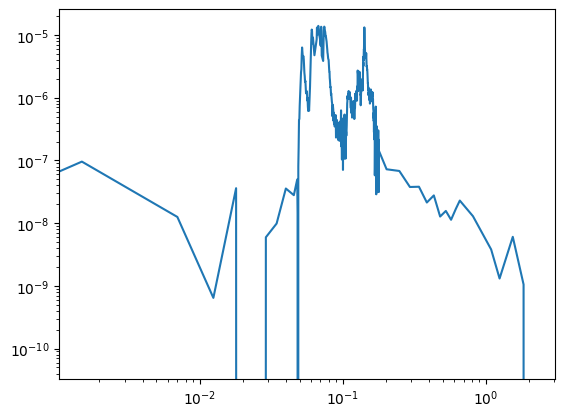

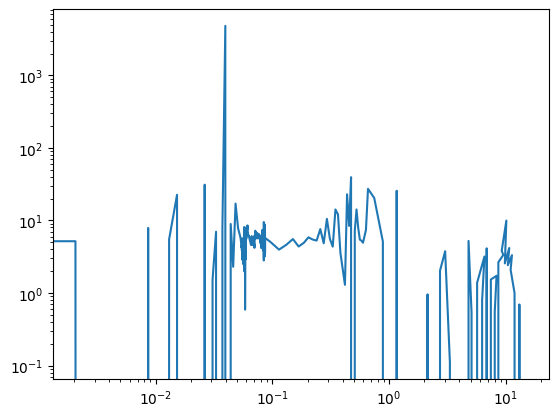

In [8]:
plt.figure()

!head picsit/grb221009a_afterglow_picsit_lc.txt

picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picsit_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])
picsit_ag = pd.read_csv("picsit/grb221009a_picsit_prompt_afterglow_erg_230301.txt", delim_whitespace=True, names=["mjd", "flux", "flux_err"])


plt.plot(
    (picsit_ag.mjd - (T0_ijd + 51544))*24, 
    picsit_ag.flux, 
)

plt.loglog()

plt.figure()

plt.plot(
    (picsit_hr.mjd - (T0_ijd + 51544))*24, 
    picsit_hr.hr, 
)

plt.loglog()

In [9]:
import numpy as np
from rebin import rebin_in_bins


In [10]:
picsit_ag.sort_values('mjd', inplace=True)

# picsit_ag['flux_err'] = picsit_ag.flux*0 + 1e-8
picsit_ag['dt']  = np.concatenate([[0], np.array(picsit_ag['mjd'])[1:] - np.array(picsit_ag['mjd'])[:-1]])
picsit_ag['dt']

0      0.000000
1      0.000238
2      0.000229
3      0.000230
4      0.000231
         ...   
551    0.011530
552    0.006606
553    0.012333
554    0.012212
555    0.012244
Name: dt, Length: 556, dtype: float64

In [11]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f409089a280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f4090858be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f4090858fd0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f4090858130>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f4090877610>]

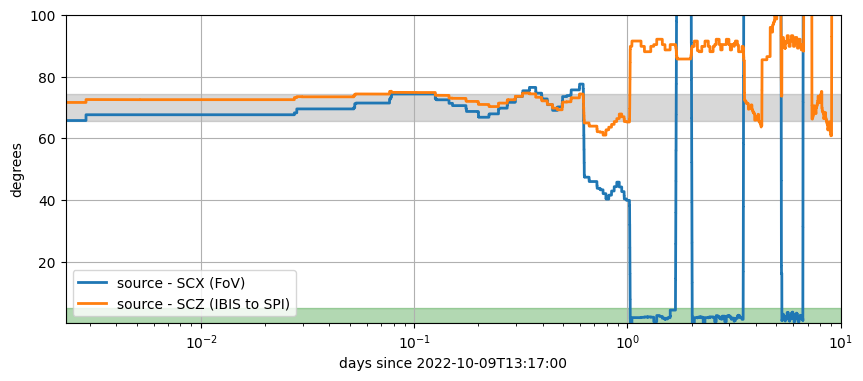

In [12]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600
ijd2plot_d = lambda T: (T - T0_ijd)

att_hist = None

for orbit in ["2558", "2559", "2560", "2561"]:
    _ = sshopen(f"/isdc/arc/rev_3/aux/adp/{orbit}.001/attitude_historic.fits.gz")[1].data
    if att_hist is None:
        att_hist = _
    else:
        att_hist = np.concatenate([att_hist, _])



scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")

theta = scx.separation(src_coord).deg

plt.figure(figsize=(10, 4))


def plot_obs():
    plt.step(
    # plt.scatter(
        ijd2plot_d(att_hist['TIME']),
        # att_hist['RA_SCX'],
        # att_hist['DEC_SCX']
        theta,
        where="pre",
        label="source - SCX (FoV)",
        lw=2
    )

    plt.step(
        ijd2plot_d(att_hist['TIME']),
        -1 * scz.separation(src_coord).deg + 180,
        label="source - SCZ (IBIS to SPI)",
        where='pre',
        lw=2
    )

    # m_stable_ons_response = theta > 60
    m_stable_ons_response = ijd2plot_d(att_hist['POINTING_TIME']) - att_hist['DURATION']/24/3600 < 0.1
    m_stable_ons_response &= ijd2plot_d(att_hist['POINTING_TIME']) > -0.1



    plt.axhspan(0, 5, color='green', alpha=0.3, 
                # label='< 5 deg, FoV observations with ISGRI and JEM-X'
                )
    # plt.axhspan(5, 10, color='yellow', alpha=0.3)

    plt.axhspan(theta[m_stable_ons_response].min(), theta[m_stable_ons_response].max(), color='grey', alpha=0.3,
                # label="range of relative source angles with stable all-sky response"
                )
    

    return m_stable_ons_response

plot_obs()

plt.xlim([200/24/3600, 10])
plt.ylim([0.1, 100])

# plt.loglog()
plt.semilogx()

plt.legend(loc='lower left')

plt.xlabel(f"days since {T0_isot}")
plt.ylabel(f"degrees")

plt.grid()

plt.savefig("relpos_history.pdf")

In [13]:
att_hist

array([(b'25580000', b'P', b'P', 0, 8316.73990954, 8316.73990954, 8316.73990954, 1.157035e+04, 0., 315.00226, -34.99975  , 210.64058, -19.506361, b'            ',   0.     , 0.       , 111.2, 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 0, 8316.87382157, 8316.87894889, 8316.87465491, 0.000000e+00, 0., 316.01096, -36.77675  , 210.02783, -20.223055, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 1, 8316.87382157, 8316.87894889, 8316.87512944, 0.000000e+00, 0., 316.89224, -38.214638 , 209.46721, -20.823944, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       ...,
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26026833, 2.100000e+02, 0., 152.00063,   2.997611 , 241.2125 , -14.717639, b'0244-00053-1', 151.5325 , 2.4294446,  53. , 0, 0.3,  6.205e-04, -0.0023855),
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26269889, 2.69990

In [14]:
"""
obs1 (1-1.7 days, 8 rings):
 Model Flux 0.0014555 photons (1.0229e-11 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 3.7829e-05 photons (7.6619e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 3.359e-06 photons (1.455e-13 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs2 (2-3.5 days, 4 rings):
 Model Flux 0.00027077 photons (1.8924e-12 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 6.3803e-06 photons (1.2892e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 5.4611e-07 photons (2.3622e-14 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs3 (5.3-6.6 days, 2 rings):
 Model Flux 4.473e-05 photons (3.0338e-13 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 7.8889e-07 photons (1.5892e-14 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 6.4597e-08 photons (2.7899e-15 ergs/cm^2/s) range (20.000 - 100.00 keV)
"""

rings = {
    'r2558': {
        'flux_ecs_3_10': 1.0229e-11,
        't1_since_t0_d': 1,
        't2_since_t0_d': 1.7,
    }
}

In [15]:
import ogip.core
import ogip.tools

import importlib

importlib.reload(ogip.tools)


def get_conversion(instr):
    pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_spectrum_GRB221009A_{focus_obs_name}.fits")
    rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_rmf_GRB221009A_{focus_obs_name}.fits")
    arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_arf_GRB221009A_{focus_obs_name}.fits")


    model_generator = lambda p:(lambda x:(p[0]*(x/25.)))
    fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5], pha, rmf, None, 
                                            mask=~np.isnan(pha._rate))

    # TODO: check
    return ogip.tools.get_unfolding_factor(fitted_model, rmf, arf) * u.keV.to(u.erg)


get_conversion('IBIS').mean(), 1e-8/200

INFO:root:opened grbbase_fitspack_total_3p/IBIS_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7f402ac35fd0>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7f402abc0370>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7f402ac2f1f0>


(2.824827e-11, 5e-11)

In [16]:
m = np.array(picsit_ag.mjd)
m[1:][~((m[1:] - m[:-1]) > 0)]

array([], dtype=float64)

In [17]:
lc_by_instrument = {}

In [40]:
gedrate = hklc['/SPI_GEDRATE']
gedrate

,t,dt,c,ds
0,8317.507977,0.040009,19699,43820.040008
1,8317.507989,1.040009,20287,43821.040009
2,8317.508000,2.040009,19738,43822.040008
3,8317.508012,3.040011,19845,43823.040010
4,8317.508023,4.040011,20335,43824.040010
...,...,...,...,...
7995,8317.600512,7995.045364,19346,51815.045364
7996,8317.600523,7996.045364,20252,51816.045364
7997,8317.600535,7997.045366,19747,51817.045366
7998,8317.600547,7998.045366,19517,51818.045366


[]

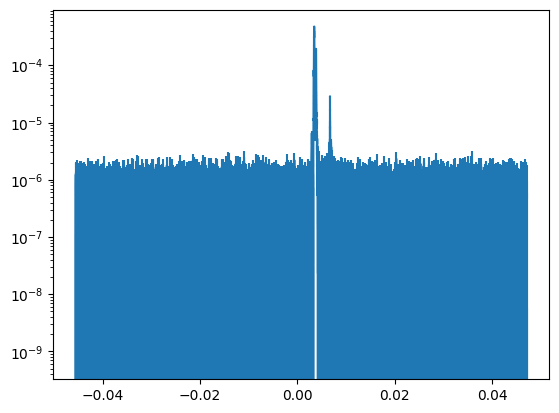

In [66]:
plt.figure()

m = gedrate.t < T0_ijd - 100./24/3600

resp = 4e8
gedrate['flux'] = (gedrate.c - np.mean(gedrate.c[m]))/resp
gedrate['flux_err'] = gedrate['flux']*0 + np.std(gedrate.c[m])/resp


plt.errorbar(
    ijd2plot(gedrate.t),
    gedrate.flux,
    gedrate.flux_err
)
plt.semilogy()

In [80]:
picsit_bti = pd.read_csv("picsit/grb221009a_bti_list.txt", delim_whitespace=True, names=["t1", "t2"])

for i, r in picsit_bti.iterrows():
    print(r.t1, r.t2)
    picsit_ag.flux[(picsit_ag.mjd > r.t1) & (picsit_ag.mjd < r.t2)] = np.NaN

59861.55557508222 59861.55559625096
59861.555623106426 59861.555623739376
59861.55602204203 59861.55626627378
59861.55643693712 59861.55656065312
59861.55714926659 59861.557170313834


/tmp/ipykernel_2435958/71059673.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gedrate.flux[~m] = np.NaN
INFO:root:opened grbbase_fitspack_total_3p/JMX1_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7f40197e2d90>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7f401a4a7280>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7f4020447df0>
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = 

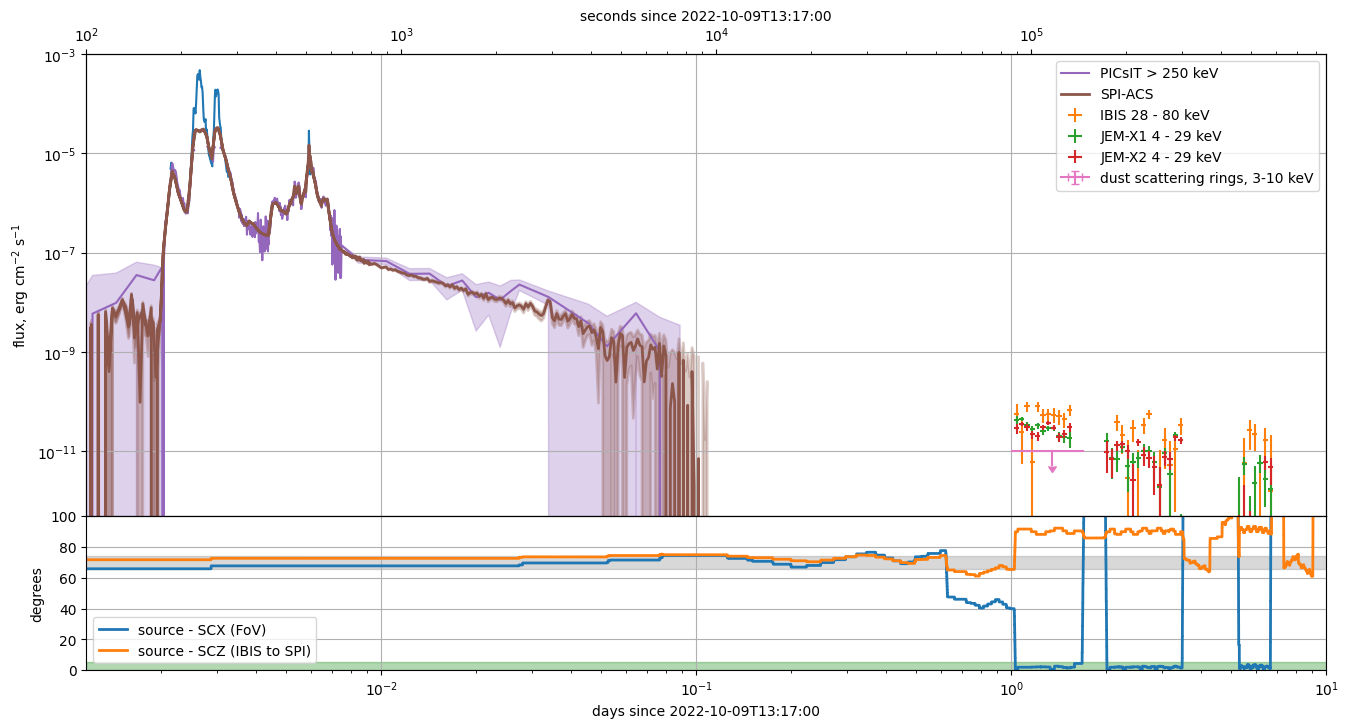

In [82]:
from astropy.io import fits

t_mjd_offset = 70./24/3600

T = np.logspace(-1, 1, 120)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

# plt.figure(figsize=(16, 6))
f, axes = plt.subplots(2, 1, figsize=(16, 8), height_ratios=[3, 1], sharex=True)
plt.sca(axes[0])

ijd2plot = lambda t:(t- T0_ijd)

plt.axhline(0, lw=2, c='k', alpha=0.5)


m = ((_:=ijd2plot(gedrate.t - t_mjd_offset)) < 0.01) & (_ > 0.002)
m &= gedrate.flux > 3e-6
gedrate.flux[~m] = np.NaN

plt.plot(
    ijd2plot(gedrate.t - t_mjd_offset),
    gedrate.flux,
    label='SPI GeD rate < 8 MeV'
)

for label, n in [('IBIS', 'IBIS'),
                 ('JEM-X1', 'JMX1'),
                 ('JEM-X2', 'JMX2')
                ]:

    f = fits.open(f"grbbase_fitspack_total_3p/{n}_lc_GRB221009A.fits")
    d = f[1].data
    conversion_factor = get_conversion('JMX1').mean()

    # plt.errorbar(ijd2plot(isgri_lc['TIME']), isgri_lc['RATE'], isgri_lc['ERROR'])

    d['RATE'][d['ERROR'] > np.nanmedian(d['ERROR'])*10] = np.NaN    

    r = rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T)
    re = rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x))

    m = re < np.nanmedian(re)*3

    # factor = 1e-8/200
    factor = conversion_factor

    plt.errorbar(
        Tc[m], 
        r[m]*factor,
        re[m]*factor,
        xerr=dT[m],
        label=f"{label} {int(f[1].header['E_MIN']):d} - {int(f[1].header['E_MAX']):d} keV",
        ls=""
    )

    lc_by_instrument[n] = {'t': Tc[m], 'r': r[m], 're': re[m], 'conversion_factor': conversion_factor}

m = (picsit_ag.mjd - (T0_ijd + 51544)) < 0.1

c = plt.plot(
# c = plt.errorbar(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m],
    # picsit_ag.flux_err[m],
    # xerr=picsit_ag.dt[m]/2,
    # ls="",
    label='PICsIT > 250 keV'
)[0].get_color()

plt.fill_between(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m] - picsit_ag.flux_err[m],
    picsit_ag.flux[m] + picsit_ag.flux_err[m],
    # xerr=picsit_lc.dt[m]/2,
    # ls="",
    # label='PICsIT > 250 keV'
    alpha=0.3,
    color=c
)


lc_by_instrument['picsit'] = {'t': (picsit_ag.mjd - (T0_ijd + 51544))[m], 'r': picsit_ag.flux[m], 're': picsit_ag.flux_err[m], 'conversion_factor': 1}

n = 1000

def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


## ACS
# TODO: check values
bkg = 5336.468053846153
cts_to_fluence = 3e-10

tail_change = 0.01
tail_bins = np.logspace(-3, np.log10(0.11), 300)

acs_T = np.concatenate([np.linspace(0, tail_change, int(tail_change/3*24*3600)), tail_bins])
acs_Tc = (acs_T[1:] + acs_T[:-1])/2.
acs_dT = (acs_T[1:] - acs_T[:-1])/2.

from rebin import rebin_in_bins, rebin_bins_in_bins


acs_C = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_mean, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmin = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_max, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmax = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_min, acs_T, agg=lambda x:(np.sum(x))/len(x))

c = None

c = plt.plot(
    acs_Tc- t_mjd_offset,
    acs_C * cts_to_fluence,
    lw=2,
    label="SPI-ACS"
)[0].get_color()


c = plt.fill_between(
    acs_Tc - t_acs_offset,
    acs_Cmin * cts_to_fluence,
    acs_Cmax * cts_to_fluence,
    lw=2,
    color=c,
    alpha=0.3
)

lc_by_instrument['acs'] = {'t': acs_Tc - t_acs_offset, 'r': acs_C, 're': (acs_Cmax - acs_Cmin)/2, 'conversion_factor': cts_to_fluence}

# TODO: picsit erange

plt.errorbar(
    (rings['r2558']['t1_since_t0_d'] + rings['r2558']['t2_since_t0_d'])/2.,
    rings['r2558']['flux_ecs_3_10'],
    rings['r2558']['flux_ecs_3_10']/2.,
    xerr=(rings['r2558']['t2_since_t0_d'] - rings['r2558']['t1_since_t0_d'])/2., 
    uplims=[True],
    label="dust scattering rings, 3-10 keV"
)



plt.ylim([0.5e-12, 1e-3])
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")
plt.loglog()
plt.grid()
plt.legend()

plt.sca(axes[1])

m_stable_ons_response = plot_obs()

plt.ylabel("degrees")
plt.ylim([0, 100])
plt.xlim([100./24/3600, 10])

# plt.grid(which='both')
plt.grid()

plt.legend(loc="lower left")

plt.xlabel(f"days since {T0_isot}")

plt.subplots_adjust(hspace=0)
# plt.semilogx()

plt.sca(axes[0])
xl_d = plt.gca().get_xlim()

ax = plt.twiny()
ax.set_xlabel(f"seconds since {T0_isot}")
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()


plt.savefig("lc.png")
plt.savefig("lc.pdf")

# TODO: plot early AG SPI-ACS
# TODO: plot model fitb
# TODO: plot rings contribution approx



9.999988000013202e-12 [9.999999999999994e-06]


[]

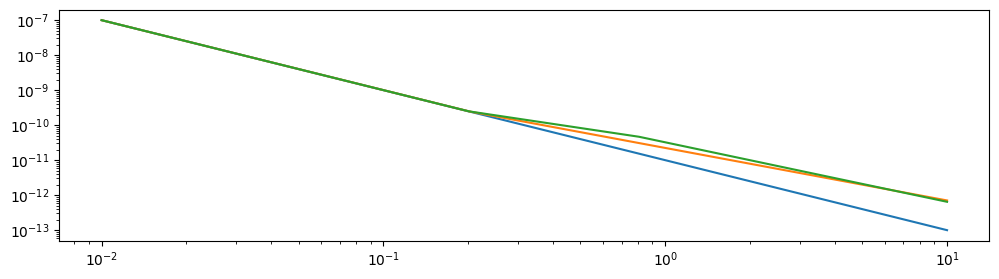

In [19]:
t_N = 1.

def conversion_for_instrument(i):
    return lc_by_instrument[i]['conversion_factor']

def s_t_model_gen(N, slope, t_break=np.NaN, slope_pb=np.NaN, t_break_er=np.NaN, slope_mid=np.NaN):

    def model(t, i):
        this_N = N
        this_slope = slope

        if not np.isnan(t_break) and t > t_break:
            this_slope = slope_pb
            this_N -= np.log10(t_break) * (slope_pb - slope)
            if not np.isnan(t_break_er):
                this_N += np.log10(t_break) * (slope_mid - slope)    
                this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        if not np.isnan(t_break_er) and t_break_er < t < t_break:
            this_slope = slope_mid
            this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
        
        # if t > 1 and t < 1.7:
        #     m += rings_flux_ecs_3_10_r2558
    
        return m
    
    # TODO: this is too slow
    return np.frompyfunc(model, 2, 1)    

print(s_t_model_gen(-11, -1.2)(1.000001, 'picsit'), s_t_model_gen(-11, -1.2)(np.array([0.00001]), 'picsit'))

plt.figure(figsize=(12, 3))

t = np.logspace(-2, 1, 1000)

plt.plot(t, s_t_model_gen(-11, -2)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.2, -1.5)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.8, -1.7, 0.2, -1.2)(t, 'picsit'))
plt.loglog()

/tmp/ipykernel_2435958/1446606060.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
  0%|          | 0/30 [00:00<?, ?it/s]/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 30/30 [00:02<00:00, 11.46it/s]


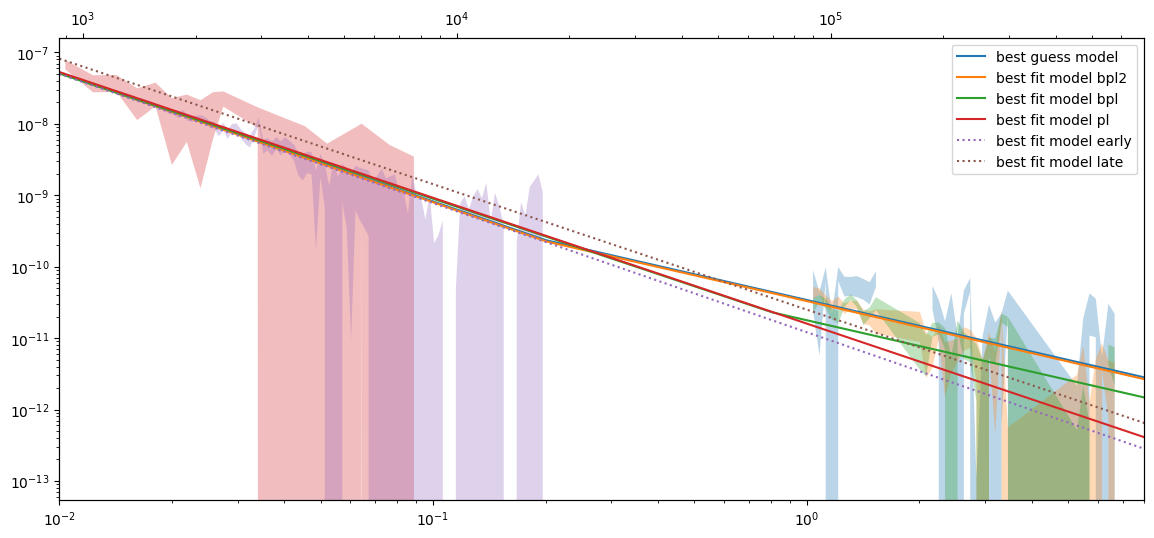

In [20]:
import numpy as np
import emcee
from scipy.stats import norm


plt.figure(figsize=(14, 6))


def fitit(ipick, p0_v = [np.log10(1e-11), -1.8]):
    ndim, nwalkers = len(p0_v), 100
    p0_c = np.array([p0_v]*nwalkers)
    p0 = norm(p0_c, p0_c.__abs__()*0.05).rvs()

    def log_prior(p):
        if not (-12.5 < p[0] < -10.5):
            return -np.inf
        
        if not (-3 < p[1] < -1):
            return -np.inf

        if len(p) > 2 and not np.isnan(p[2]) and not (0.01 < p[2] < 5):
            return -np.inf

        return 0.0
        

    def log_prob(p):
        mll = 0

        lp = log_prior(p)
        if not np.isfinite(lp):
            return -np.inf

        for n, d in lc_by_instrument.items():
            # print(n)
            if ipick(n):
            # if n in ['JMX1', 'JMX2', 'IBIS', 'picsit']:
                model = s_t_model_gen(*p)(d['t'], n)

                sigma2 = d['re']**2

                m = d['t'] > 1000./24/3600
                dev = ((model - d['r'])**2/sigma2)[m]
                
                c_mll = -0.5 * dev.sum() + np.log(sigma2.mean())

                # c_mll = norm(model, d['re']).logpdf(d['r']) #.sum()

                # print(p, 'model', s_t_model_gen(*p)(1, n), c_mll)
                
                mll += c_mll.sum()

        if np.isnan(mll):
            print("this returns NaN:", p, mll)
            return -np.inf
                
        return mll + lp

    # from multiprocessing import Pool

    # with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob) #, pool=pool)
    sampler.run_mcmc(p0, nsampler, progress=True)

    p_best = [np.mean(np.percentile(r, [40, 60])) for r in sampler.flatchain.transpose()]
    p_range = [np.percentile(r, [5, 95]) for r in sampler.flatchain.transpose()]
    return {'p_best': p_best, 'p_range': p_range}


T = np.logspace(-2, 1, 100)

plt.plot(T, s_t_model_gen(np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2)(T, 'picsit'), label="best guess model")

ag_fit = {}


r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2])
ag_fit['all_bpl2'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label=f"best fit model bpl2")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2])
ag_fit['all_bpl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model bpl")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8])
ag_fit['all_pl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model pl")

r = fitit(lambda n: n in ['acs', 'picsit'])
ag_fit['acs_picsit'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model early", ls=":")

r = fitit(lambda n: n in ['JMX1', 'JMX2', 'IBIS'])
ag_fit['jmx_ibis'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model late", ls=":")


plt.legend()

for n, d in lc_by_instrument.items():
    m = d['t'] > 0.01
    plt.fill_between(d['t'][m], 
                     (d['r'] - d['re'])[m] * conversion_for_instrument(n),
                     (d['r'] + d['re'])[m] * conversion_for_instrument(n), alpha=0.3)

plt.loglog()
plt.xlim([1e-2, 8])

xl_d = plt.gca().get_xlim()

plt.twiny()
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()

plt.savefig("st_models.pdf")
plt.savefig("st_models.png")

# TODO: separate fits for two sections with a break
# TODO: make spectral real
# TODO: make steps with fill

In [21]:
for nm, m in ag_fit.items():
    pnames = ["N", "slope"]

    if nm == "all_bpl":
        pnames += ["t_br", "slope_pb"]

    elif nm == "all_bpl2":
        pnames += ["t_br", "slope_pb", "t_br_er", "slope_mid"]

    for n, p, pr in zip(pnames, m['p_best'], m['p_range']):
        print(nm, n, p, pr)
        m[n] = {
            'mean': p,
            'stat_err_minus': p - pr[0],
            'stat_err_plus': pr[1] - p
        }

ag_fit

all_bpl2 N -10.90803866708451 [-11.40608692 -10.17575476]
all_bpl2 slope -1.8107382001691965 [-1.91532494 -1.71230821]
all_bpl2 t_br 0.8041111104895278 [0.74056672 0.86989219]
all_bpl2 slope_pb -1.2103824494255293 [-1.31227441 -1.09901007]
all_bpl2 t_br_er 0.2015116236495483 [0.18517008 0.21807265]
all_bpl2 slope_mid -1.1962387833879333 [-1.28347184 -1.10633355]
all_bpl N -10.801241122196775 [-11.36850601 -10.46850796]
all_bpl slope -1.7533059389542638 [-1.8973853 -1.6197923]
all_bpl t_br 0.8084930851698331 [0.73792351 0.89769001]
all_bpl slope_pb -1.1972612425781315 [-1.31752511 -1.08518161]
all_pl N -10.796989779524601 [-11.22910246 -10.1664744 ]
all_pl slope -1.7616188588285975 [-1.88189031 -1.60321803]
acs_picsit N -10.917652909988718 [-11.31215187 -10.2901599 ]
acs_picsit slope -1.8083930663396288 [-1.9068619  -1.72349197]
jmx_ibis N -10.601568459702625 [-11.33731093 -10.50322348]
jmx_ibis slope -1.7571712033541549 [-2.01673968 -1.25057945]


{'all_bpl2': {'p_best': [-10.90803866708451,
   -1.8107382001691965,
   0.8041111104895278,
   -1.2103824494255293,
   0.2015116236495483,
   -1.1962387833879333],
  'p_range': [array([-11.40608692, -10.17575476]),
   array([-1.91532494, -1.71230821]),
   array([0.74056672, 0.86989219]),
   array([-1.31227441, -1.09901007]),
   array([0.18517008, 0.21807265]),
   array([-1.28347184, -1.10633355])],
  'N': {'mean': -10.90803866708451,
   'stat_err_minus': 0.49804825717552426,
   'stat_err_plus': 0.7322839093596709},
  'slope': {'mean': -1.8107382001691965,
   'stat_err_minus': 0.10458673766812288,
   'stat_err_plus': 0.09842998904250289},
  't_br': {'mean': 0.8041111104895278,
   'stat_err_minus': 0.06354439433782666,
   'stat_err_plus': 0.06578108446126263},
  'slope_pb': {'mean': -1.2103824494255293,
   'stat_err_minus': 0.10189196198973849,
   'stat_err_plus': 0.11137238033663288},
  't_br_er': {'mean': 0.2015116236495483,
   'stat_err_minus': 0.016341542118286145,
   'stat_err_plus'

In [22]:

# import corner

# samples = sampler.get_chain(flat=False)
# flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# # _=plt.hist(samples[:, 0], 100, color="k", histtype="step")
# fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
# labels = ["m", "b", "log(f)"]
# for i in range(ndim):
#     ax = axes[i]
#     ax.plot(samples[:, :, i], "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
#     ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

# axes[-1].set_xlabel("step number")

# _ = corner.corner(flat_samples)

# # plt.xlabel(r"$\theta_1$")
# # plt.ylabel(r"$p(\theta_1)$")
# # plt.gca().set_yticks([]);

In [23]:
lc_pdf = "lc.pdf"
rings = rings
relpos_history_pdf = "relpos_history.pdf"
st_models_pdf = "st_models.pdf"
comment_reconstruction = "assuming slope of -2"
theta_ons_min = theta[m_stable_ons_response].min()
theta_ons_max = theta[m_stable_ons_response].max()
approx_ons_t1_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].min() + 51544, format='mjd').isot
approx_ons_t1_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].min() - T0_ijd
approx_ons_t2_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].max() + 51544, format='mjd').isot
approx_ons_t2_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].max() - T0_ijd
ons_response_change_pc = 20 # check
ag_fit = ag_fit